In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [136]:
df1=pd.read_csv('/content/Customers.csv')

In [137]:
df1.tail(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1990,1991,Female,30,166983,69,Artist,7,3
1991,1992,Female,97,129444,96,Entertainment,5,6
1992,1993,Male,94,181183,24,Marketing,9,3
1993,1994,Female,64,175254,100,Artist,9,5
1994,1995,Female,19,54121,89,Engineer,6,3
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [138]:
#Checking the Information of Data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [114]:
#Converting the Categorical Variable to Numerical Variable Gender
df1['Profession']=df1['Profession'].apply({'Artist':0,'Doctor':1,'Engineer':2,'Entertainment':3,'Executive':4,'Healthcare':5,'Homemaker':6,'Lawyer':7,'Marketing':8}.get)

In [115]:
df1['Gender']=df1['Gender'].apply({'Male':0,'Female':1}.get)

In [139]:
#Checking the Null Values
df1.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [140]:
#determining mode of 'Profession' column
df1["Profession"].mode()

0    Artist
Name: Profession, dtype: object

In [141]:
#replacing null values with mode
df1["Profession"].fillna("Artist", inplace=True)

In [142]:
df1.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [120]:
gender_count=df1['Gender'].value_counts()
print(gender_count)

1    1186
0     814
Name: Gender, dtype: int64


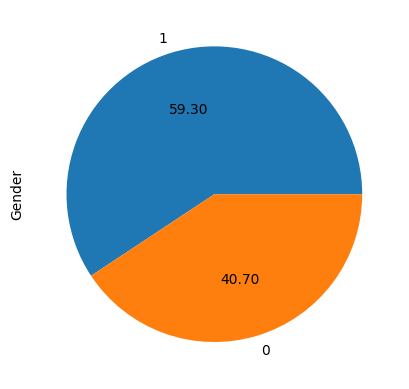

In [121]:
df1['Gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()
#This Pie Graph reperents that the Female are more then Male. indicating a bias towards the female gender. 1200 Are Females and 800 are Males.
#The model will get impacted by gender if we train the model.
#We can also see some more graphs related to gender.

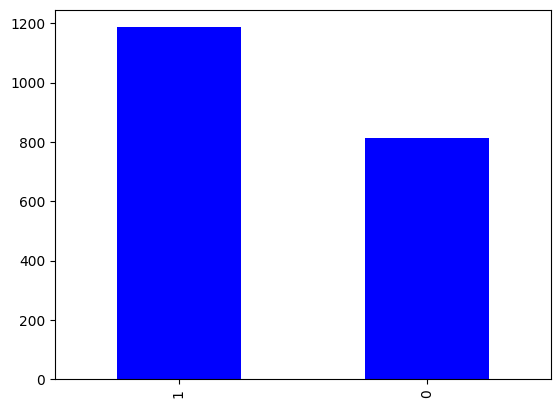

In [122]:
df1['Gender'].value_counts().plot(kind="bar",color='b')
plt.show()

Text(0, 0.5, 'Y Axis')

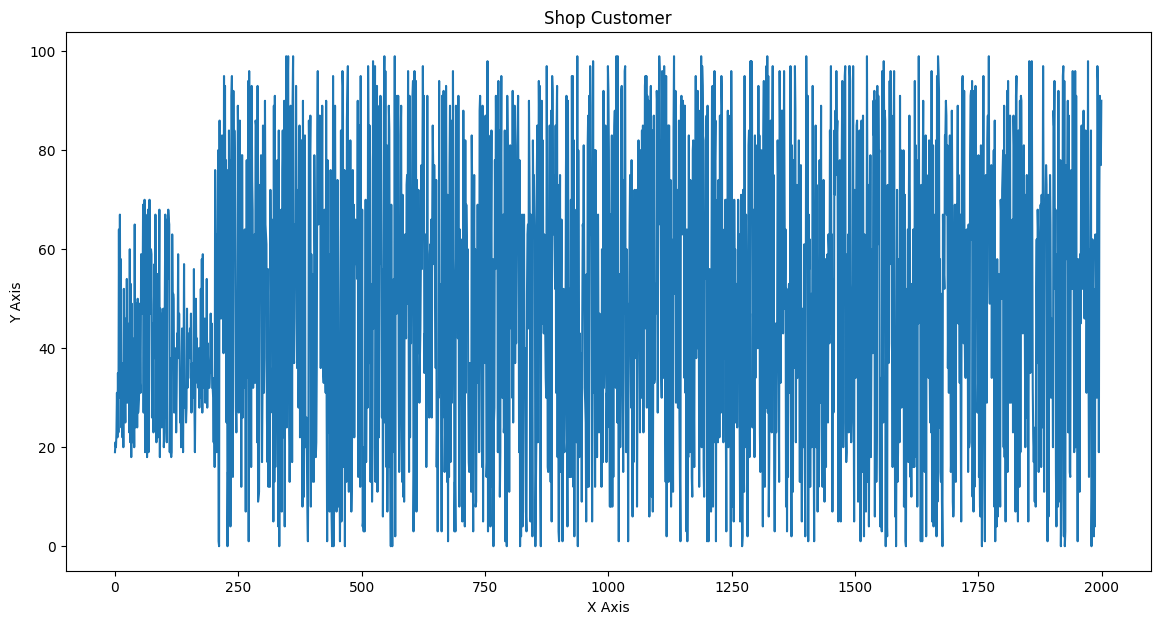

In [123]:
#Line Graph
ax=df1['Age'].plot(figsize=(14,7),title="Shop Customer")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

<Axes: >

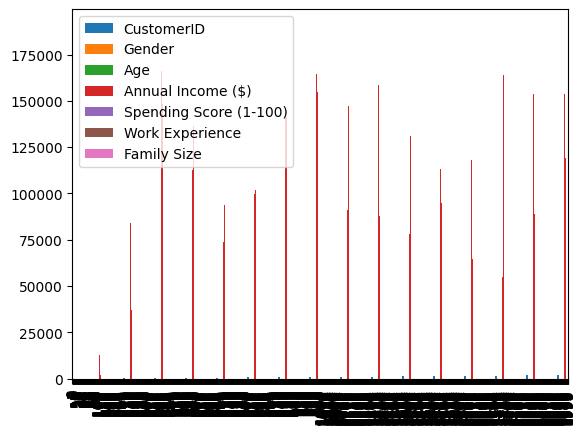

In [124]:
#BAR GRAPH
df1.plot(kind='bar')

<Axes: ylabel='Frequency'>

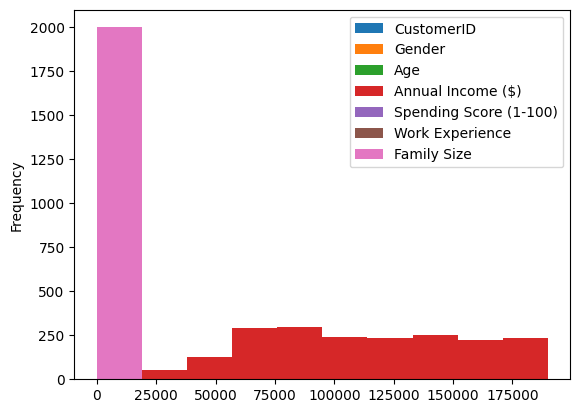

In [125]:
#Histogram
df1.plot(kind='hist')

'\nThe distribution of annual income versus gender is similar to the distribution of age versus gender. \nThere is no significant impact of gender on the annual income. And that is really great to be see.\n'

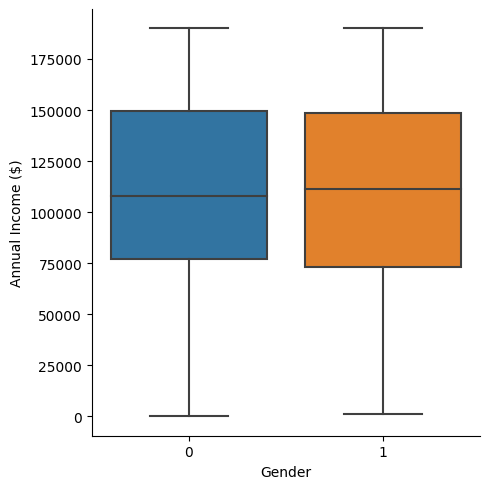

In [126]:
sns.catplot(x='Gender',y='Annual Income ($)',kind='box', data=df1)
'''
The distribution of annual income versus gender is similar to the distribution of age versus gender. 
There is no significant impact of gender on the annual income. And that is really great to be see.
'''

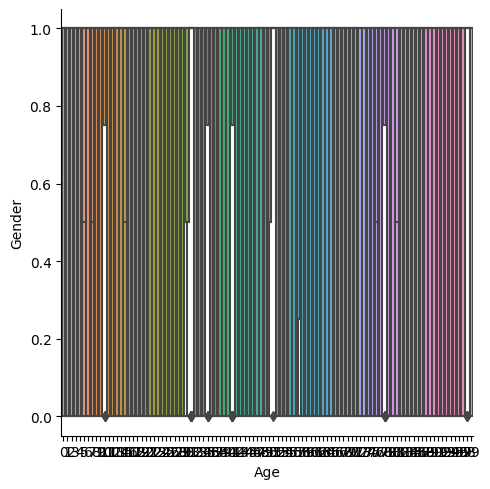

In [127]:
sns.catplot(x='Age',y='Gender',kind='box', data=df1)
#No Conclusion can be seen as the data is looking normally distributed.
#We can't find any conculsion based on Paramter Gender.

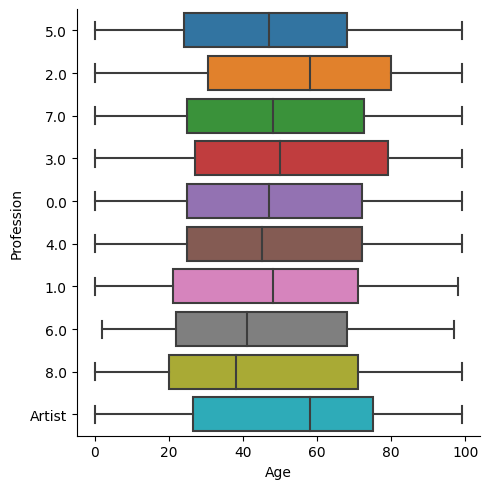

In [128]:
sns.catplot(x='Age',y='Profession',kind='box', data=df1)

'\nit appears that the distribution of income for certain professions such as healthcare, \nengineering, law, entertainment, art, executive and medicine, remains relatively stable. \nHowever, there are some notable changes in the distribution of income for individuals \nin the home-making profession, where the lower values tend to shift slightly higher\n'

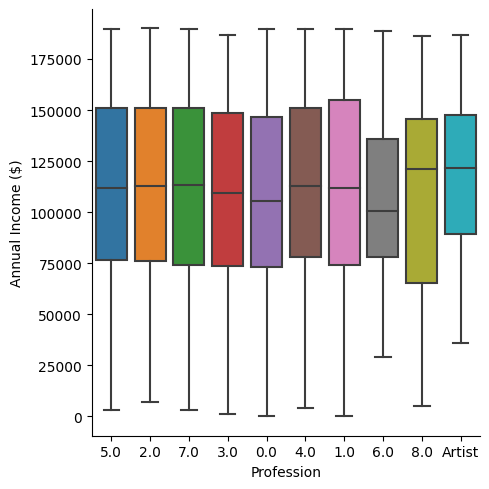

In [129]:
sns.catplot(x='Profession',y='Annual Income ($)',kind='box', data=df1)
'''
it appears that the distribution of income for certain professions such as healthcare, 
engineering, law, entertainment, art, executive and medicine, remains relatively stable. 
However, there are some notable changes in the distribution of income for individuals 
in the home-making profession, where the lower values tend to shift slightly higher
'''

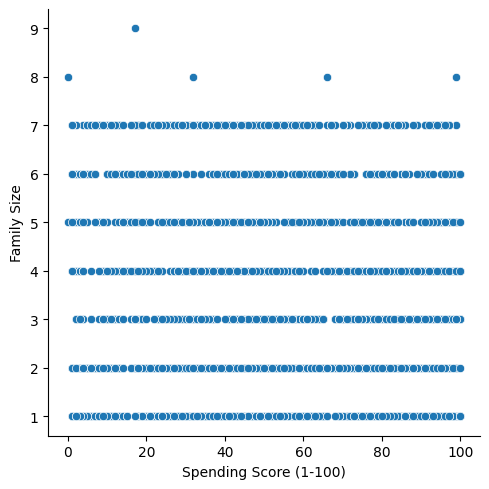

In [130]:
sns.relplot(data=df1, x='Spending Score (1-100)',y='Family Size')

In [131]:
plt.hist(x='Gender',y='Age' ,rwidth=0.8,data=df1)

(array([ 814.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1186.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

Error in callback <function _draw_all_if_interactive at 0x7ff23136d700> (for post_execute):


ConversionError: ignored

ConversionError: ignored

<Figure size 640x480 with 1 Axes>

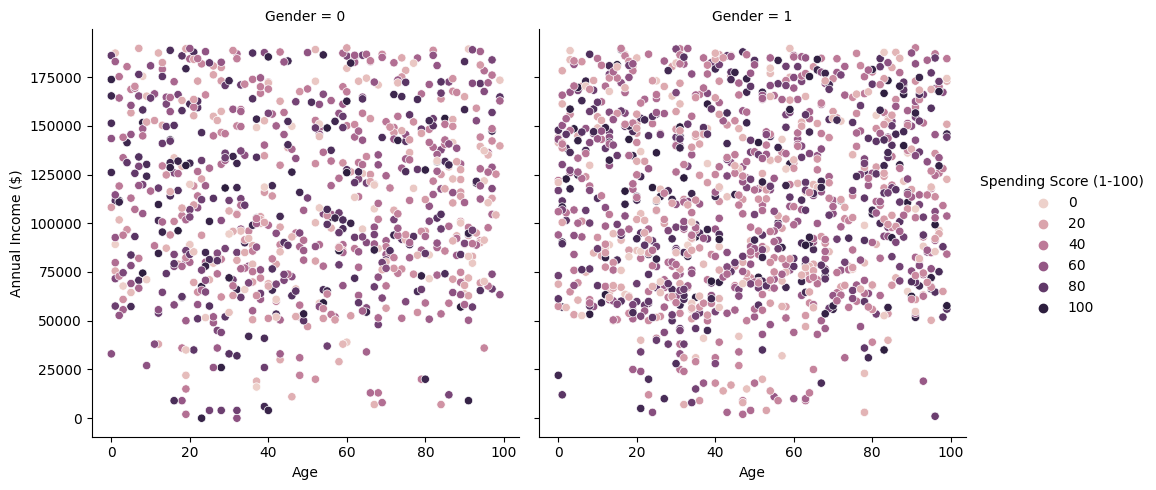

In [132]:
sns.relplot(x="Age", y="Annual Income ($)",data=df1,hue='Spending Score (1-100)',col='Gender')
plt.show()

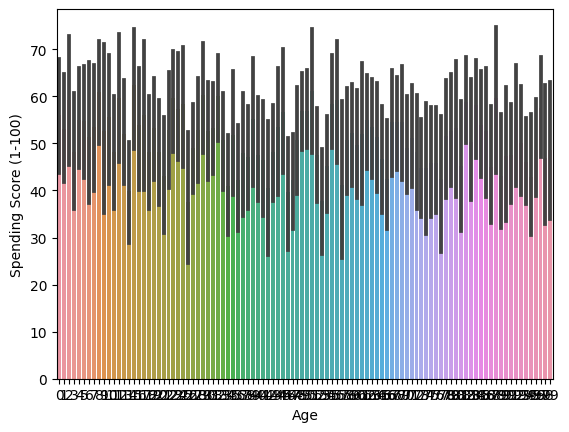

In [133]:
sns.barplot(x='Age', y='Spending Score (1-100)',data=df1)
plt.show()

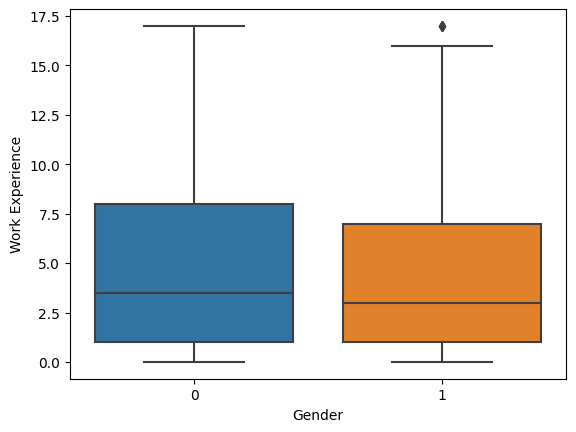

In [134]:
sns.boxplot(x='Gender',y='Work Experience',data=df1)
plt.show()

In [135]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df1,method='ward'))

ValueError: ignored

WITH THE HELP OF K MEANS CLUSTERING WE WILL TRY THIS MODEL

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(2)

In [ ]:
k_means.fit(df1)

In [ ]:
k_means_cluster=k_means.fit_predict(df1)

In [ ]:
k_means_cluster_1=k_means_cluster.copy()
k_means_cluster_1['Clusters']=cluster

In [ ]:
plt.scatter(df1['Gender'],df1['Age'],cmap='rainbow',c=k_means_cluster_1['Clusters'])

In [ ]:
print(k_means_cluster)

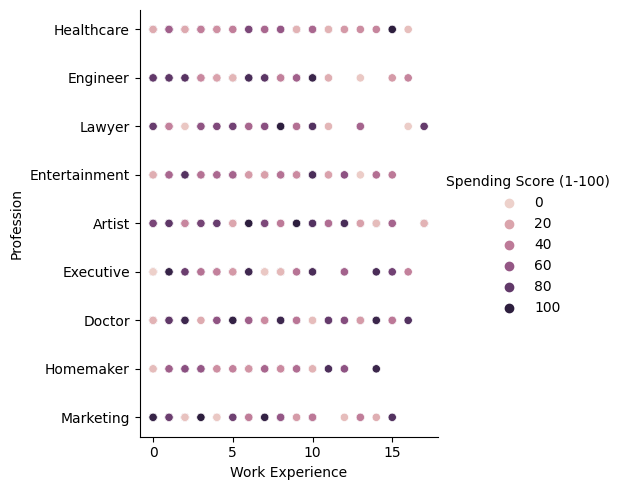

In [147]:
sns.relplot(x="Work Experience", y="Profession",data=df1,hue='Spending Score (1-100)')
plt.show()